# Logistic Regression



$p(x) = \frac{e^{\beta_0 + \beta_1 x_1 + ... + \beta_p x_p}}{1 + e^{\beta_0 + \beta_1 x_1 + ... + \beta_p x_p}}$, for any given values of $\beta_0, \beta_1$ and $x$, the value of $P(x)$ will always sit between [0,1]

Takes the log transformation of both sides and do some rearrangements (This is called **log odds** or **logit** transformation of $p(x)$), gives us

<br />

**Formula**:

$ y = log(\frac{p(x)}{1-p(x)}) = \beta_0 + \beta_1 x_1 + ... + \beta_p x_p$, where $x$ can take either continuous or categorical values

<br />

**Note**:

The coefficients of logistic regression model are calculated using **MLE (Maximum likelihood estimation)**

Log-likelihood for $N$ observations:
- $L(\beta) = \sum_{i=1}^N \{y_i \cdot log(p(x_i;\beta)) + (1-y_i) \cdot log(1-p(x_i;\beta))\} = \sum_{i=1}^N \{y_i \beta^T x_i - log(1+e^{\beta^T x_i}) \}$

<br />

The intuition behind the MLE is to find $\beta_0, \beta_1, ..., \beta_i$ such that $\hat{p}(x_i)$ has value close to one for $y_i = 1$ and has value close to zero for $y_i = 0$

## Assumptions

1. The model should not have multicollinearity (Should do some data exploration before fitting the model)

## Interpretation

1. The **sign of coefficients** represents positive/negative influence on dependent variable
2. One unit increase in $X_i$ changes the **log odds** $log(\frac{p(x)}{1-p(x)})$ by $\beta_i$
3. One unit increase in $X_i$ multiplies the **odds** $\frac{p(x)}{1-p(x)}$ by $e^{\beta_i}$
4. The amount of $p(x)$ changes depend on **the current value of $x$ and the value of $\beta$**.
    

## Practice Suggestions

(1) Since the influence of some independent variable ($x$) on dependent variable ($y$) can changes when we adding and removing other variables from the model (even the sign of coefficient may changes), the best fitted model should be derived from the full-model and perform multiple steps of model selection (e.g. drop the least significant variable and refit the model, until no further terms can be dropped)


(2) Could try use L1 penalty used in the lasso to help perform model selection

## Pros

1.

## Cons

1.

## Other comments

**(1) How is Logistic Regression better than Linear Regression?**

Linear regression has the following issues where logistic regression does not have:

- Predict negative probability for values of independent variables that are close to zero
- Predict probability larger than $1$ for values of independent variables that are very large


In [ ]:
# Import library
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [46]:
adult = pd.read_csv('/Users/kefuzhu/Desktop/PythonWorld/DataSets/adult', header = None,
                    names = ['age','workclass','fnlwgt','education','education-num',
                             'marital-status','occupation','relationship','race','sex',
                             'capital-gain','capital-loss','hours-per-week','native-country',
                             'salary'])

In [47]:
adult[0:5]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


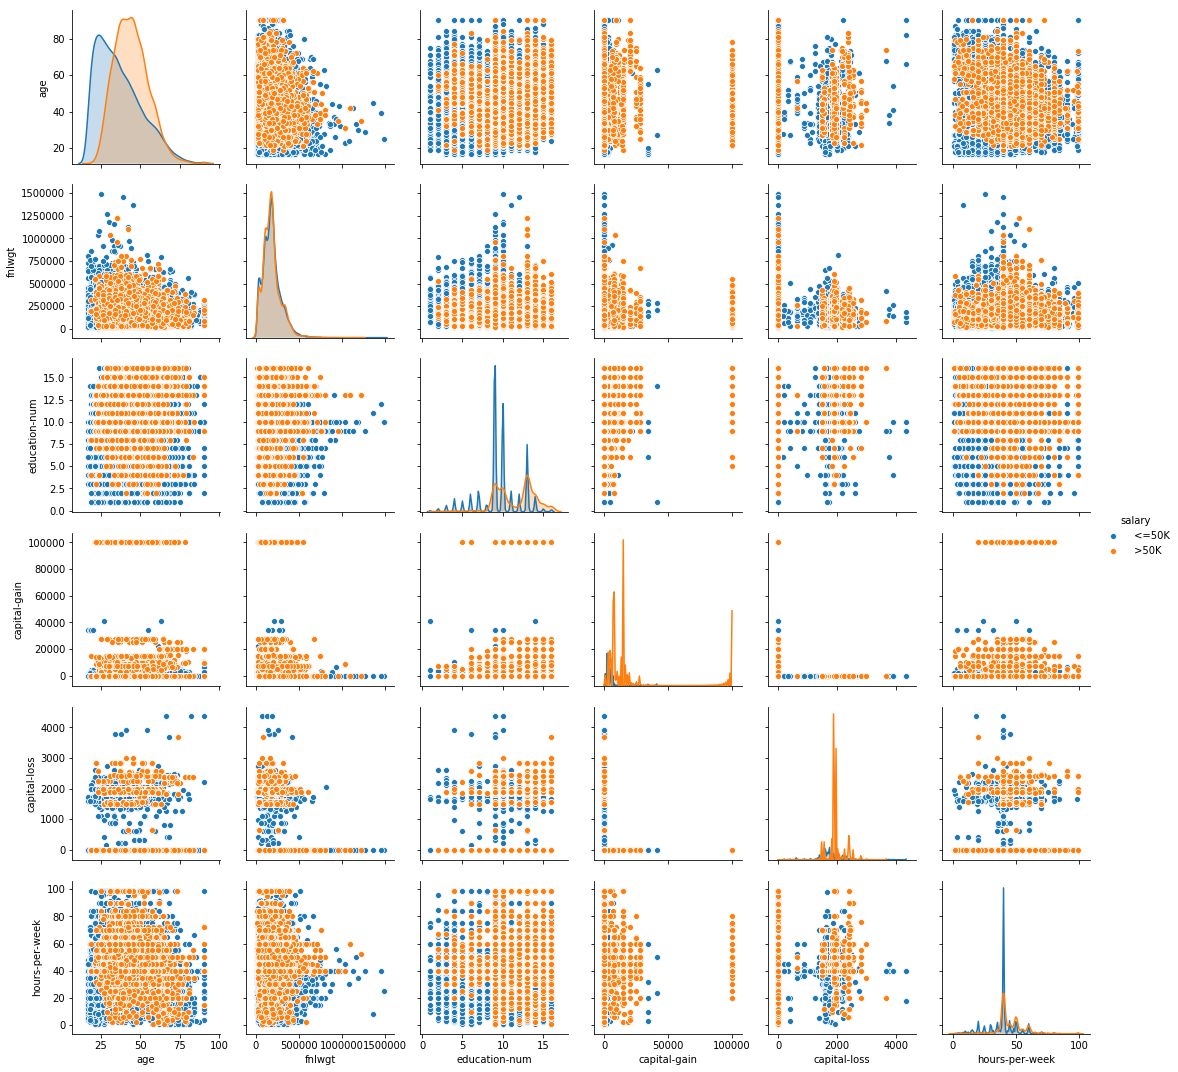

In [48]:
sns.pairplot(adult, hue = 'salary')

# Multinomial Logistic Regression

In [38]:
# Load iris dataset
iris = pd.read_csv('/Users/kefuzhu/Desktop/PythonWorld/DataSets/iris', header = None, 
                   names = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Class'])

# # Encode Class value into 1,2,3
# iris.replace('Iris-setosa','1',inplace = True)
# iris.replace('Iris-versicolor','2',inplace = True)
# iris.replace('Iris-virginica','3',inplace = True)

In [39]:
iris.head(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


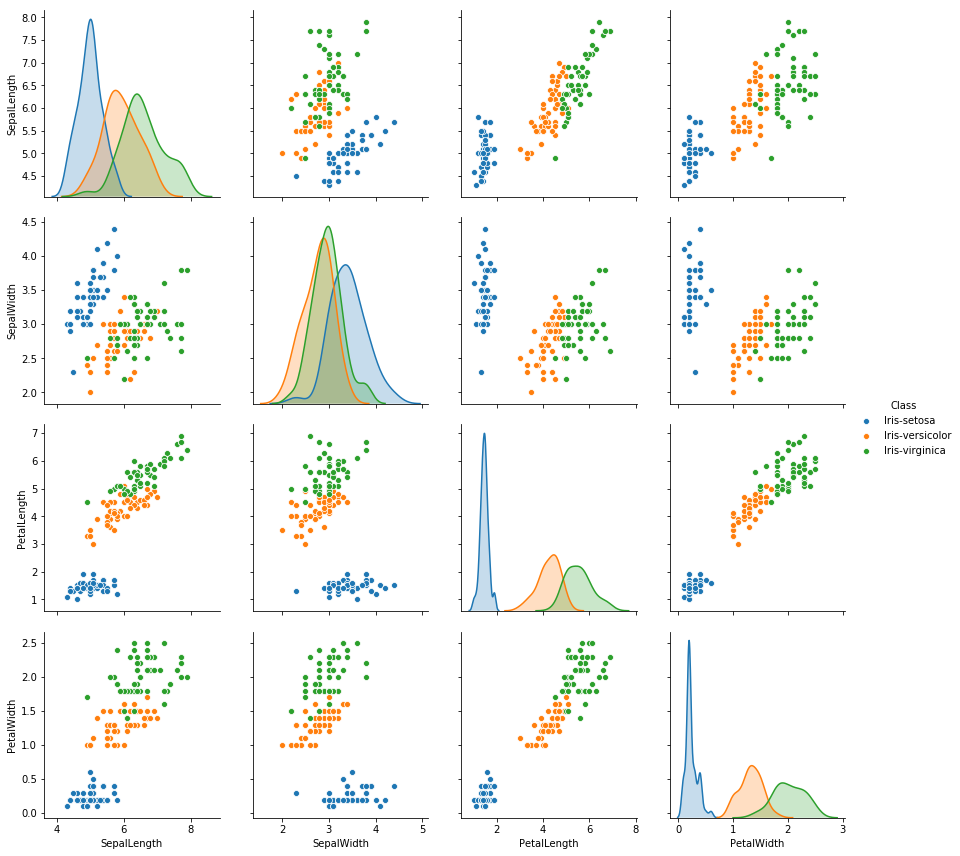

In [40]:
sns.pairplot(iris, hue = 'Class')

In [41]:
x = iris.iloc[:,:-1]
y = iris.iloc[:,-1]

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [43]:
LR = LogisticRegression()
LR = LR.fit(x_train, y_train)

In [44]:
predicted = LR.predict(x_test)
probs = LR.predict_proba(x_test)
# Generate and display different evaluation metrics
print('Test accuracy:\n')
print(metrics.accuracy_score(y_test, predicted))
print('\nConfusion matrix:\n')
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

Test accuracy:

0.9666666666666667

Confusion matrix:

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

    avg / total       0.97      0.97      0.97        30

